In [ ]:
from scipy import stats as st
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
M = 5
S1 = 3**0.5
S2 = 1**0.5
n1 = 250
n2 = 250


# **1 Раздел:**

In [ ]:
#1-ая выборка
X = st.norm(loc = M, scale = S1).rvs(n1)
print('Среднее: %.3f' %np.mean(X))
print('Дисперсия: %.3f' %np.var(X))
print('С.К.О: %.3f' %np.std(X))

Среднее: 5.057
Дисперсия: 2.723
С.К.О: 1.650


In [ ]:
#2-ая выборка
Y = st.norm(loc = M, scale = S2).rvs(n2)
print('Среднее: %.3f' %np.mean(Y))
print('Дисперсия: %.3f' %np.var(Y))
print('С.К.О: %.3f' %np.std(Y))

Среднее: 4.937
Дисперсия: 1.119
С.К.О: 1.058


In [ ]:
r = st.pearsonr(X, Y)
p = st.spearmanr(X, Y)
t = st.kendalltau(X, Y)
print(r)
print(p)
print(t)

(-0.028772752600165118, 0.6507280628281887)
SpearmanrResult(correlation=-0.027198771180338883, pvalue=0.6686698245784566)
KendalltauResult(correlation=-0.01943775100401607, pvalue=0.647095778378259)


## **2 раздел:**

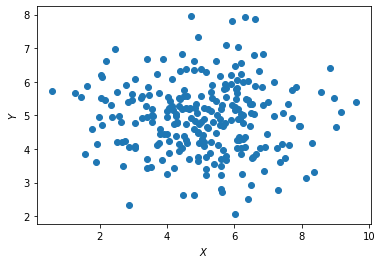

In [ ]:
plt.scatter(X, Y)
plt.ylabel('$Y$')
plt.xlabel('$X$');

## **3 Раздел:**

[[ 0.  3.  8.  6.  0.]
 [ 1. 16. 25. 11.  1.]
 [ 6. 27. 46. 16.  5.]
 [ 4. 21. 23. 14.  5.]
 [ 1.  2.  6.  3.  0.]]
[0.58313917 2.38892167 4.19470417 6.00048667 7.80626917 9.61205167]
[2.07014307 3.24611298 4.42208289 5.5980528  6.77402271 7.94999262]


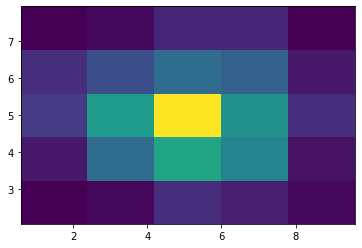

In [ ]:
plt.hist2d(X, Y, bins = 5)
arr = plt.hist2d(X, Y, bins = 5)[0]
distX = plt.hist2d(X, Y, bins = 5)[1]
distY = plt.hist2d(X, Y, bins = 5)[2]
print(arr)
print(distX)
print(distY)

In [ ]:
str = list()
sum = 0
for i in range(5):
  sum = 0
  for j in range(5):
    sum+=arr[i][j]
  str.append(sum)
print(str)
stb = list()
sum = 0
for i in range(5):
  sum = 0
  for j in range(5):
    sum+=arr[j][i]
  stb.append(sum)
print(stb)

[17.0, 54.0, 100.0, 67.0, 12.0]
[12.0, 69.0, 108.0, 50.0, 11.0]


In [ ]:
z = 0
n = 250
for i in range(5):
  for j in range(5):
      z+=((arr[i][j] - str[i]*stb[j]/n)**2)/(str[i]*stb[j]/n)
print(z)
print(st.chi2.cdf(z, 16))

12.421574032814753
0.28551443340654303


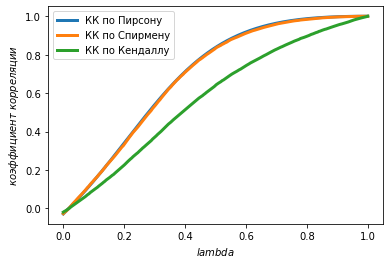

In [ ]:
x = np.linspace(0, 1, 250)
y = []
y_p = []
y_t = []

for j in range(0, 250):
  sample_U = []
  lam = x[j] 
  for i in range(0, 250):
    u = lam * X[i] + (1 - lam) * Y[i]
    sample_U.append(u)
  r = st.pearsonr(X, sample_U)[0]
  p = st.spearmanr(X, sample_U)[0]
  t = st.kendalltau(X, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

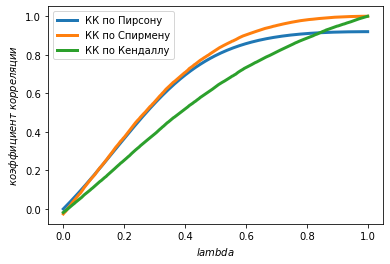

In [ ]:
x = np.linspace(0, 1, 250)
y = []
y_p = []
y_t = []

for j in range(0, 250):
  sample_U = []
  lam = x[j] 
  for i in range(0, 250):
    u = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_U.append(u)
  r = st.pearsonr(X, sample_U)[0]
  p = st.spearmanr(X, sample_U)[0]
  t = st.kendalltau(X, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

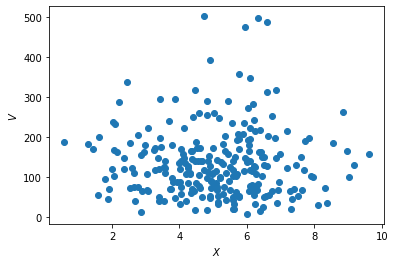

In [ ]:
lam = 0
sample_U = []
for i in range(0, 250):
    u = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_U.append(u)

plt.scatter(X, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

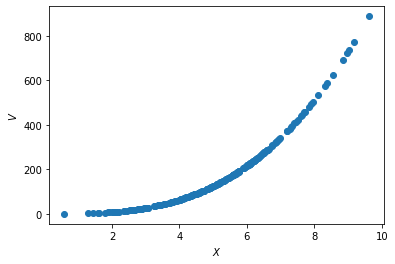

In [ ]:
lam = 1
sample_U = []
for i in range(0, 250):
    u = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_U.append(u)

plt.scatter(X, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

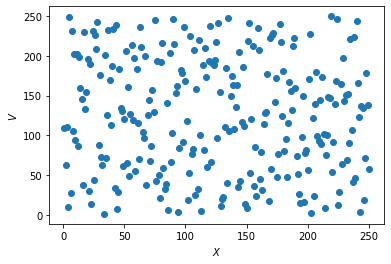

In [ ]:
lam = 0
sample_V = []
for i in range(0, 250):
    v = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_V.append(v)

sample_V_rank = st.rankdata(sample_V)
sample1_rank = st.rankdata(X)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');

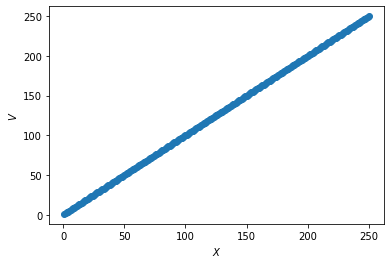

In [ ]:
lam = 1
sample_V = []
for i in range(0, 250):
    v = lam * (X[i]**3) + (1 - lam) * Y[i]**3
    sample_V.append(v)

sample_V_rank = st.rankdata(sample_V)
sample1_rank = st.rankdata(X)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');